# Explore static graph dataset

In [1]:
import pandas as pd
onodes = pd.read_csv("../res/output_nodes.csv")[["id", "lat", "lon"]]
onodes.sample(5)

,id,lat,lon
115908,4412921903,53.819058,91.355580
408173,1591288878,53.676058,91.391541
45850,1259330745,53.737929,91.434971
467234,7989249426,53.822629,91.405821
168287,1595897082,53.691385,91.507173


In [2]:
import osmnx as ox
import networkx as nx

ox.config(log_console=True, use_cache=True)
graph = ox.graph_from_place("Abakan, Russia", network_type = 'drive')

C:\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [3]:
onodes[['lat', 'lon']].to_numpy()

array([[53.7122528, 91.4090357],
       [53.6182116, 91.7421048],
       [53.7600347, 91.4190226],
       ...,
       [53.7304774, 91.3920675],
       [53.5497299, 91.2933913],
       [53.6918575, 91.5026671]])

In [3]:
drive_road_points = []

In [8]:
for point in onodes[['lat', 'lon']].to_numpy():
    drive_road_points.append(ox.get_nearest_node(graph, point))

C:\Anaconda3\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Clustering

In [49]:
from sklearn.cluster import DBSCAN

In [55]:
onodes_clustered_DBSCAN = DBSCAN(metric="haversine", algorithm="ball_tree")
onodes_clustered_DBSCAN.fit(onodes[["lat", "lon"]])

# Static Graph

C:\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
C:\Anaconda3\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Anaconda3\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


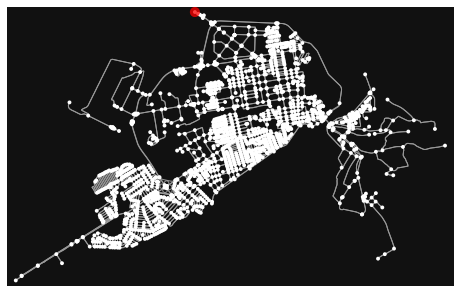

In [5]:
import osmnx as ox
import networkx as nx

ox.config(log_console=True, use_cache=True)
graph = ox.graph_from_place("Abakan, Russia", network_type = 'drive')


orig_node = ox.get_nearest_node(graph, [91.42880234, 53.70086483])
dest_node = ox.get_nearest_node(graph, [91.45223817, 53.72732416])

shortest_route = nx.paht

fig, ax = ox.plot_graph_route(graph, shortest_route, save=True)